In [7]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import pickle
import pydot

from sklearn import tree
from xgboost import plot_tree, plot_importance

PATH = "../output/total_hrs1"

df = pd.read_csv(PATH+"/result").drop(columns=['Unnamed: 0'])
df.head()

,accuracy,classification_report,est,f1,learning_rate,max_depth,max_features,min_impurity_decrease,min_samples_leaf,model,n_estimators,precision,recall,roc_auc,test_class_balance,train_class_balance,booster
0,0.925853,precision recall f1-score s...,"GridSearchCV(cv=None, error_score='raise',\n ...",0.923094,0.9,7.0,NaN,0.01,150.0,gradient_boosting,200.0,0.966316,0.883574,0.926162,"1: 50.36%, 0: 49.64%","1: 49.88%, 0: 50.12%",NaN
1,0.935314,precision recall f1-score s...,"GridSearchCV(cv=None, error_score='raise',\n ...",0.932149,0.3,9.0,NaN,NaN,NaN,xgb_tree,100.0,0.976075,0.892005,0.935152,"0: 50.19%, 1: 49.81%","1: 50.06%, 0: 49.94%",gbtree


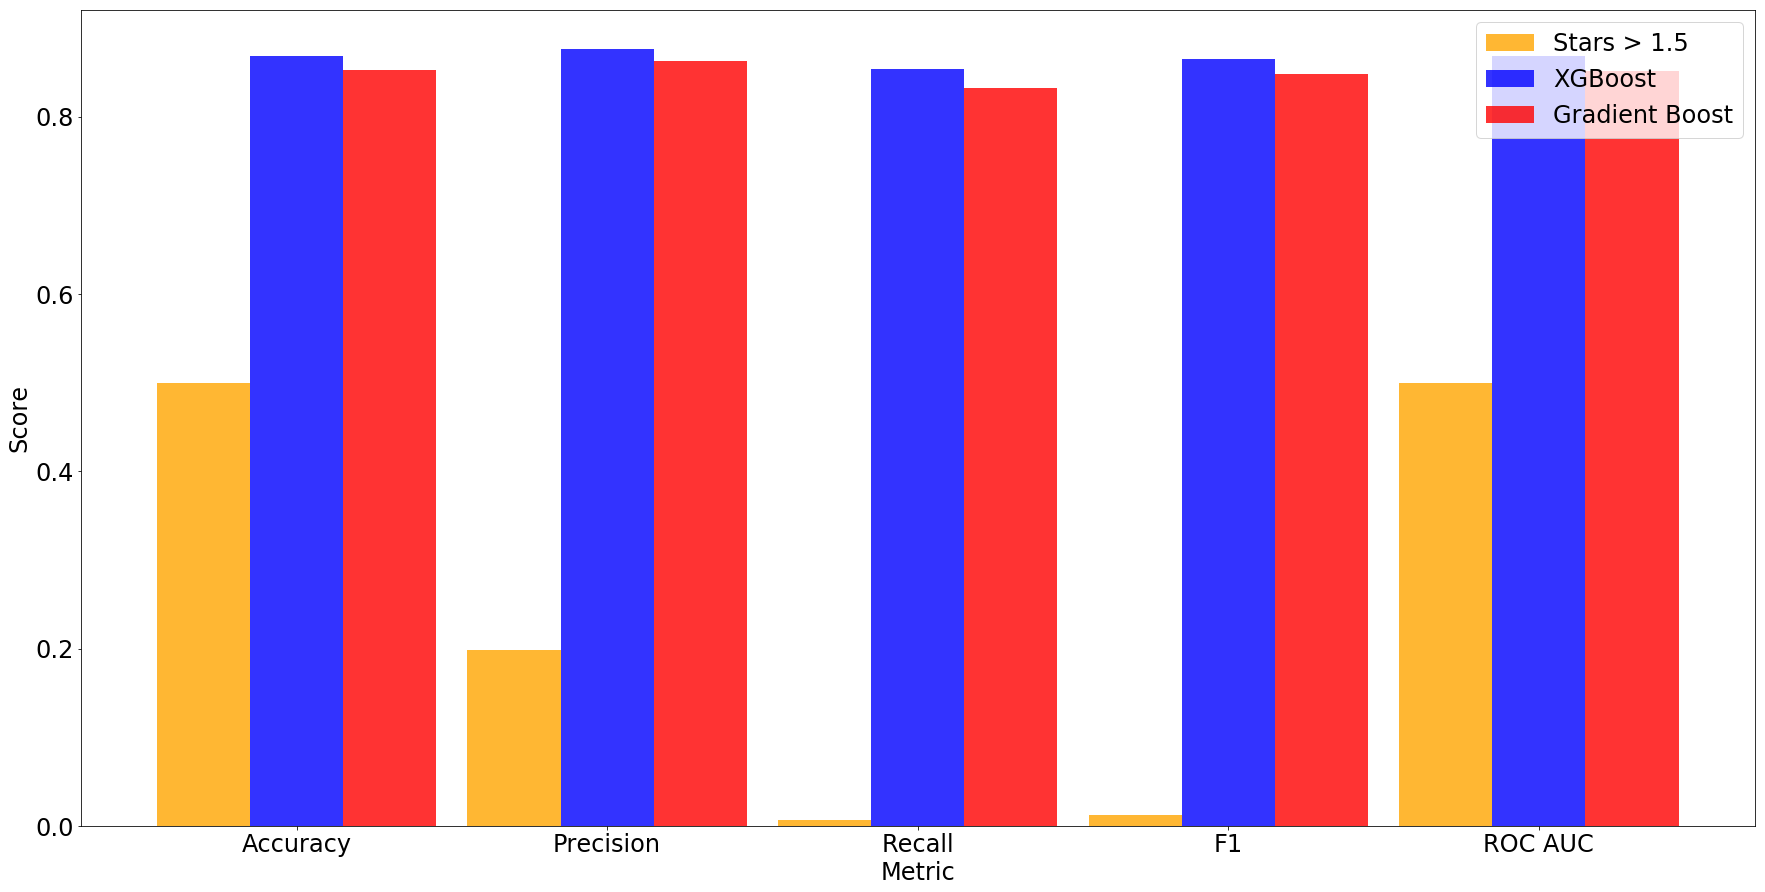

In [8]:
matplotlib.rc('font', **{'size':24})

labels = ('Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC')

scores_gb = (0.853, 0.863, 0.832, 0.848, 0.852)
scores_xgb = (0.868, 0.876, 0.854, 0.865, 0.868)
scores_baseline = (0.5, 0.198, 0.006, 0.012, 0.5)

fig, ax = plt.subplots(figsize=(30,15))
index = np.arange(5)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, scores_baseline, bar_width,
                alpha=opacity,
                color='orange',
                label='Stars > 1.5')

rects2 = plt.bar(index + bar_width, scores_xgb, bar_width,
                alpha=opacity,
                color='b', 
                label='XGBoost')

rects3 = plt.bar(index + bar_width*2, scores_gb, bar_width,
                alpha=opacity,
                color='r',
                label='Gradient Boost')

plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(index + bar_width, labels)
plt.legend()

plt.show()

## XGBoost GBTree

In [3]:
gs_xgb = pd.read_pickle(PATH+"/xgb_tree.pkl")['est'].values[0]

xgb = pd.read_pickle(PATH+"/xgb_tree.pkl")
xgb =xgb['est'].values[0].best_estimator_
xgb
#[0].best_estimator_
#xgb.get_booster().get_score(importance_type='weight')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
       max_depth=9, min_child_weight=1, missing=nan, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

../output/total_hrs1
feature columns: Index(['stars', 'noise_level', 'price', 'total_hours_wk', 'bar', 'fast_food',
       'mexican', 'chinese', 'american', 'fusion', 'chain_large',
       'chain_medium', 'chain_small', 'open_mon', 'open_tu', 'open_wed',
       'open_thu', 'open_fri', 'open_sat', 'open_sun', 'takeout', 'alcohol',
       'good_for_groups', 'credit_card'],
      dtype='object')
[('stars', 'f0'), ('noise_level', 'f1'), ('price', 'f2'), ('total_hours_wk', 'f3'), ('bar', 'f4'), ('fast_food', 'f5'), ('mexican', 'f6'), ('chinese', 'f7'), ('american', 'f8'), ('fusion', 'f9'), ('chain_large', 'f10'), ('chain_medium', 'f11'), ('chain_small', 'f12'), ('open_mon', 'f13'), ('open_tu', 'f14'), ('open_wed', 'f15'), ('open_thu', 'f16'), ('open_fri', 'f17'), ('open_sat', 'f18'), ('open_sun', 'f19'), ('takeout', 'f20'), ('alcohol', 'f21'), ('good_for_groups', 'f22'), ('credit_card', 'f23')]
[('mexican', 0.019932659932659934), ('bar', 0.02356902356902357), ('chain_small', 0.0243771043771

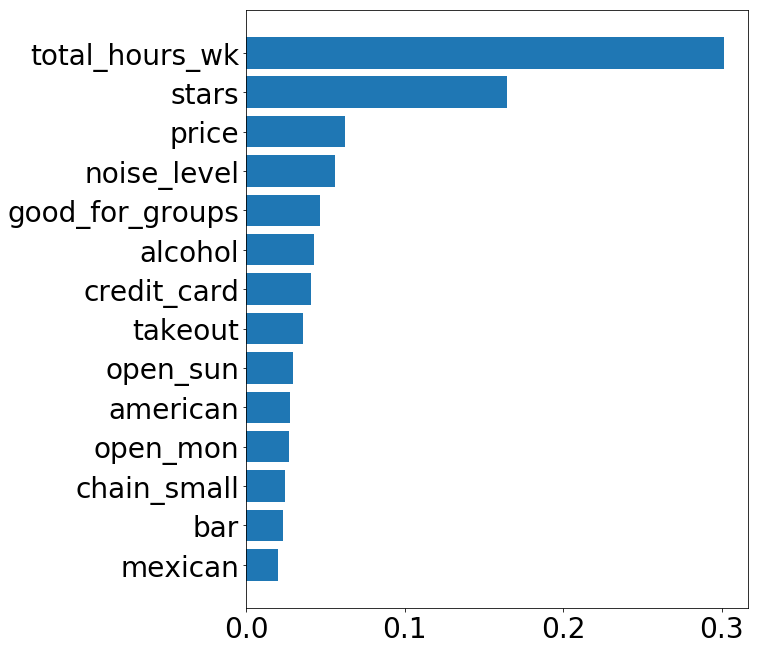

In [4]:
print(PATH)
# Feature importances
features = pd.read_csv(PATH + "/data/features").drop(columns=['Unnamed: 0'])
columns = features.columns
print("feature columns:", columns)

def get_feature_importance(xgb, features):
    imp_vals = xgb.get_booster().get_score()
    imp_dict = {features[i]:float(imp_vals.get('f'+str(i),0.)) for i in range(len(features))}
    print([(features[i], 'f'+str(i)) for i in range(len(features))])
    total = sum(list(imp_dict.values()))
    return {k:(v/total) for k,v in imp_dict.items()}

#print(feat)
feat = get_feature_importance(xgb, columns)
feat = sorted(feat.items(), key=lambda kv: kv[1])[10:]
print(feat)


matplotlib.rc('font', **{'size' : 28})
fig = plt.figure(figsize=(9, 11))
plt.barh(y=[t[0] for t in feat], width=[t[1] for t in feat])
#plt.bar(x=list(feat.keys()), height=list(feat.values()))
plt.show()

In [94]:
plt.savefig(PATH + "/xgb_features.png")

<Figure size 432x288 with 0 Axes>

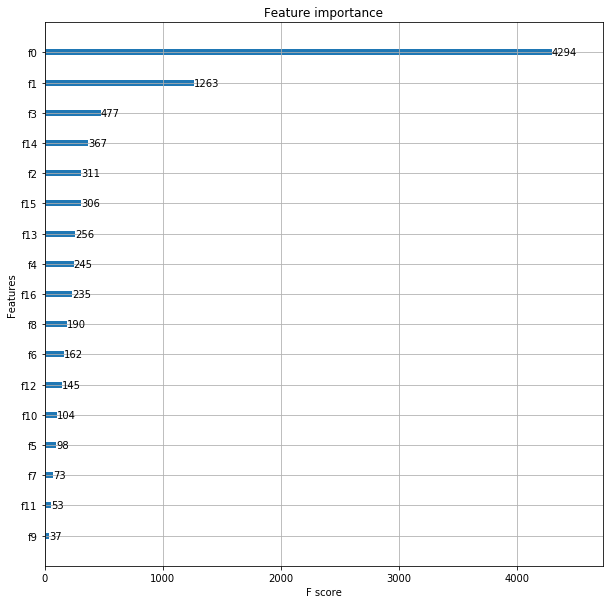

In [178]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_importance(xgb, ax=ax)

In [38]:
fig, ax = plt.subplots(figsize=(10, 30))
plot_tree(xgb, rankdir='LR', ax=ax)
fig = plt.gcf()
fig.set_size_inches(110, 165)
#fig.savefig(PATH+'/xgb_tree_horiz.png')

# Gradient Boosting

In [5]:

gs = pd.read_pickle(PATH + "/gradient_boosting.pkl")['est'].values[0]#models['est'][0]
gb = gs.best_estimator_
gb

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.9, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.01, min_impurity_split=None,
              min_samples_leaf=150, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

                  0         1
16         open_thu  0.000348
17         open_fri  0.000415
11     chain_medium  0.003744
9            fusion  0.004396
15         open_wed  0.005867
5         fast_food  0.006329
10      chain_large  0.006586
7           chinese  0.006833
14          open_tu  0.006894
18         open_sat  0.007977
6           mexican  0.008343
12      chain_small  0.010296
23      credit_card  0.010667
20          takeout  0.011921
4               bar  0.012373
19         open_sun  0.012919
8          american  0.012943
13         open_mon  0.013044
1       noise_level  0.018730
22  good_for_groups  0.020093
21          alcohol  0.020207
2             price  0.031269
0             stars  0.086359
3    total_hours_wk  0.146447


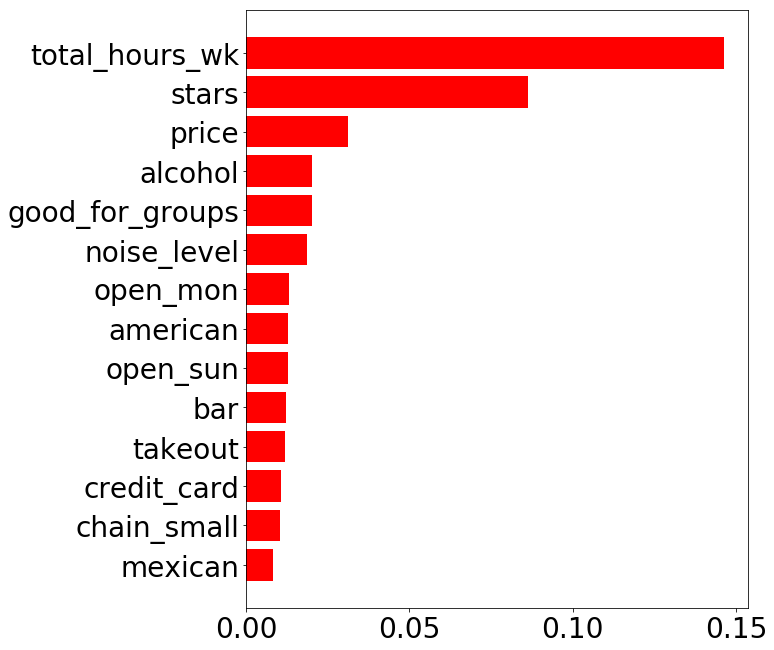

In [6]:
# Feature importances
features = pd.read_csv(PATH + "/data/features").drop(columns=['Unnamed: 0'])
columns = features.columns

Feat_Imp = list(zip(columns,gb.feature_importances_))
Feat_Imp2 = pd.DataFrame(Feat_Imp)
Feat_Imp2.sort_values(by=1,ascending=True,inplace=True)
Feat_Imp2.reset_index()
print(Feat_Imp2)

fig = plt.figure(figsize=(9, 11))

matplotlib.rc('font', **{'size' : 28})
plt.barh(y=Feat_Imp2[0][10:], width=Feat_Imp2[1][10:], color='r')

plt.show()


In [48]:
#print(gb.estimators_[-1])
es = gb.estimators_[61][0]
tree.export_graphviz(es, out_file=PATH + '/gb_tree', feature_names=columns)
(graph,) = pydot.graph_from_dot_file(PATH + '/gb_tree')
graph.write_png(PATH + '/gb_tree.png')

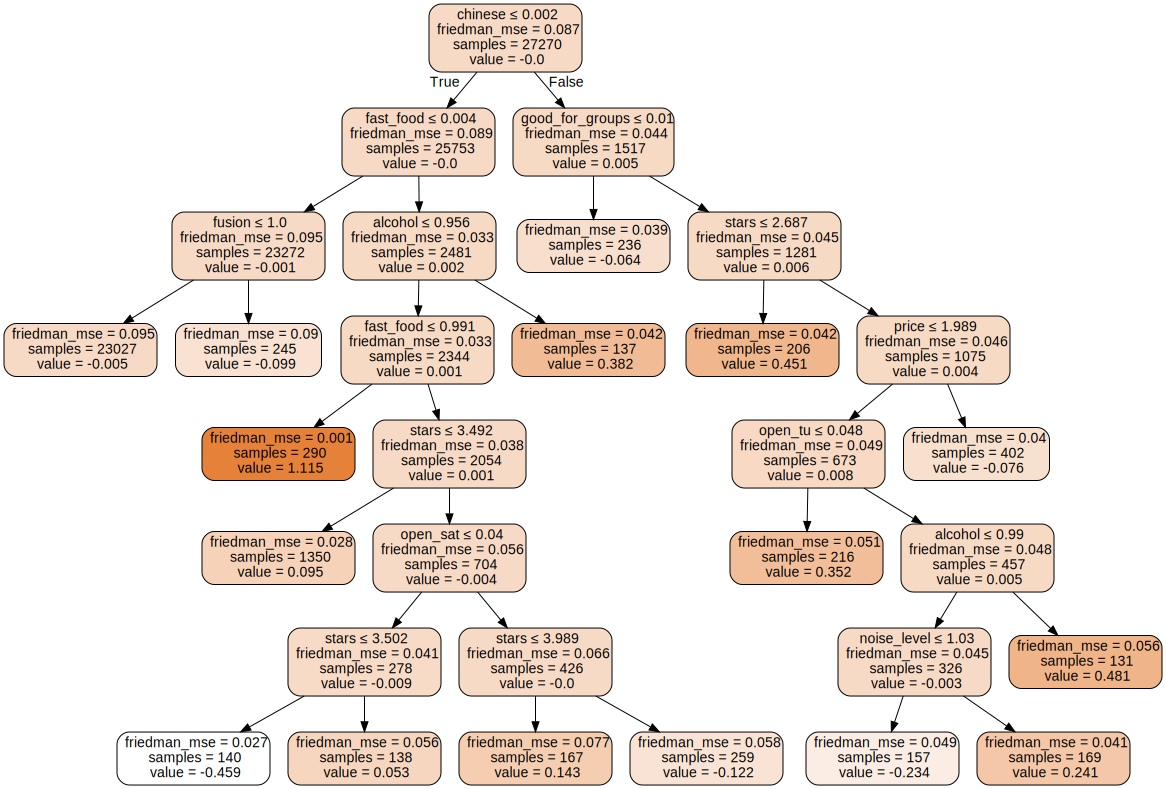

In [60]:
import graphviz
dot_data = tree.export_graphviz(es, out_file=None,
                               feature_names=columns,
                               #class_names=es.classes_,
                               filled=True, rounded=True,
                            special_characters=True)
graph = graphviz.Source(dot_data)
graph

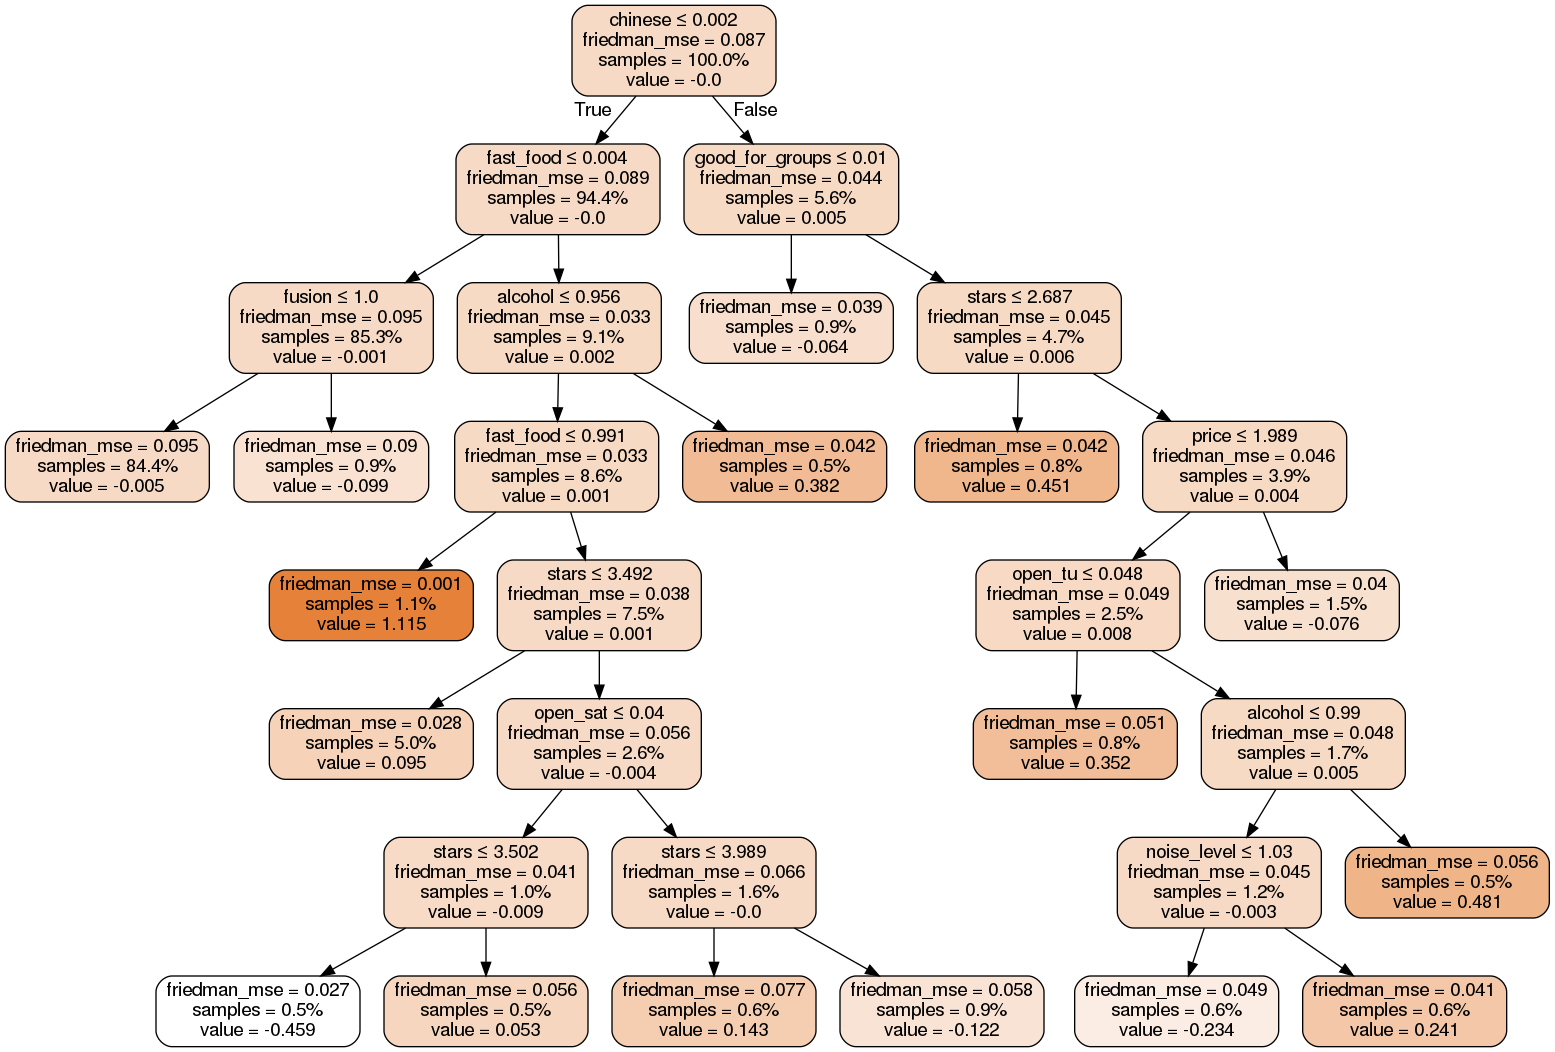

In [52]:
import pydotplus
dot_data = tree.export_graphviz(es, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf(PATH + '/gb_tree.pdf')

from IPython.display import Image
dot_data = tree.export_graphviz(es, out_file=None,
                               feature_names=columns,
                               class_names=['close', 'open'],
                               filled=True, rounded=True,
                               special_characters=True,
                               proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data)

nodes = graph.get_node_list()

Image(graph.create_png())